Load required libraries

In [116]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error

1. Check for stationarity of time series and exploring the data

Text(0.5, 1.0, 'Stock Price of Companies over the years')

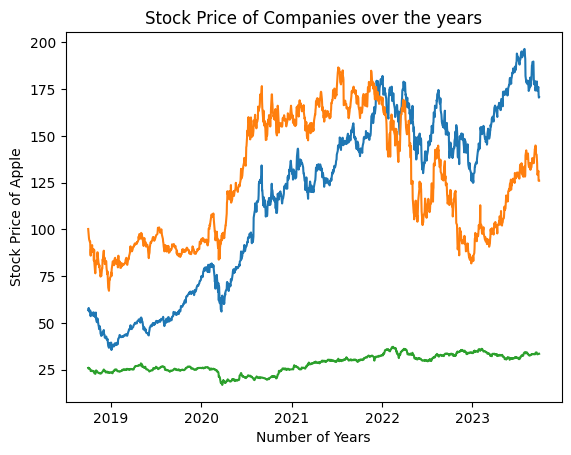

In [117]:
df = pd.read_csv("./CA2-Stock-Price-Data.csv")
df.index = pd.to_datetime(df.Date, format = '%m/%d/%Y')
df.drop('Date', axis = 1, inplace = True)
# df.head()

plt.plot(df.index, df['Apple'])
plt.ylabel('Stock Price of Apple')
plt.xlabel('Number of Years')

plt.plot(df.index, df['Amazon'])
plt.ylabel('Stock Price of Apple')
plt.xlabel('Number of Years')

plt.plot(df.index, df['DBS'])
plt.ylabel('Stock Price of Apple')
plt.xlabel('Number of Years')
plt.title('Stock Price of Companies over the years')

# print(df)

Here can can see that DBS has a constant fluctuating stock price, while both Apple and Amazon stock prices both had very random upward and downward non-linear changes.

Checking for stationarity for each stock

In [118]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your DataFrame and 'column_name' is the name of your time series column
time_series_data = df['Apple']

# Perform the Augmented Dickey-Fuller test
adftest = adfuller(time_series_data)

print('number of observations:', adftest[3], '\np-value', adftest[1])

number of observations: 1256 
p-value 0.7650692611897274


Apple:

Null Hypothesis: The series is non-stationary
Alternate Hypothesis: The series is stationary.

Based on the ADF (Augmented Dickey Fuller) Test
Since the p-value is much larger than 0.05, therefore we cannot
reject the null hypothesis. The Apple time series is non-stationary

In [119]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your DataFrame and 'column_name' is the name of your time series column
time_series_data = df['Amazon']

# Perform the Augmented Dickey-Fuller test
adftest = adfuller(time_series_data)

print('number of observations:', adftest[3], '\np-value', adftest[1])

number of observations: 1256 
p-value 0.4586527645365138


Amazon:

Null Hypothesis: The series is non-stationary
Alternate Hypothesis: The series is stationary.

Based on the ADF (Augmented Dickey Fuller) Test
Since the p-value is much larger than 0.05, therefore we cannot
reject the null hypothesis. The Amazon time series is non-stationary

In [120]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your DataFrame and 'column_name' is the name of your time series column
time_series_data = df['DBS']

# Perform the Augmented Dickey-Fuller test
adftest = adfuller(time_series_data)

print('number of observations:', adftest[3], '\np-value', adftest[1])

number of observations: 1254 
p-value 0.6556796201732031


DBS:

Null Hypothesis: The series is non-stationary
Alternate Hypothesis: The series is stationary.

Based on the ADF (Augmented Dickey Fuller) Test
Since the p-value is much larger than 0.05, therefore we cannot
reject the null hypothesis. The DBS time series is non-stationary

P-value > 0.05: Fail to reject the null hypothesis (H0), the data has
a unit root and is non-stationary.
o P-value <= 0.05: Reject the null hypothesis (H0), the data does not
have a unit root and is stationary

Since all the stock prices p-values is more than > 0.05, we reject the status quo and therefore the time serires is non-stationary, so we ahve to do differencing.

2. Identify the trend,
seasonality and random
components in a time
series

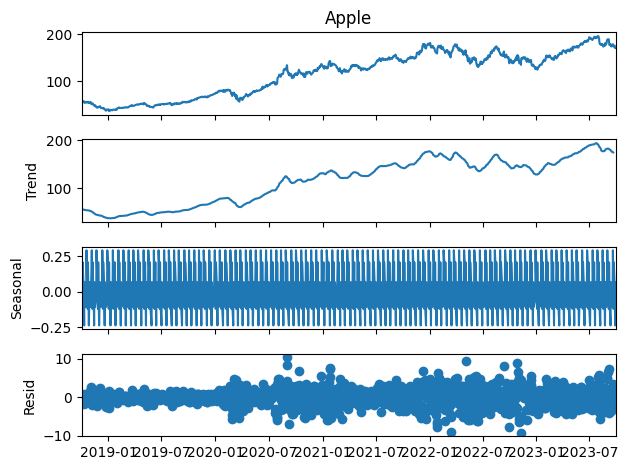

In [121]:
# Perform seasonal decomposition
result = seasonal_decompose(df['Apple'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

Trend- Long-run increase and upward non-linear increase
Seasonal - Short-term regular wave-like patterns
Residual - Unpredictable, random, “residual” fluctuations
Due to random variations of Nature or unusual events

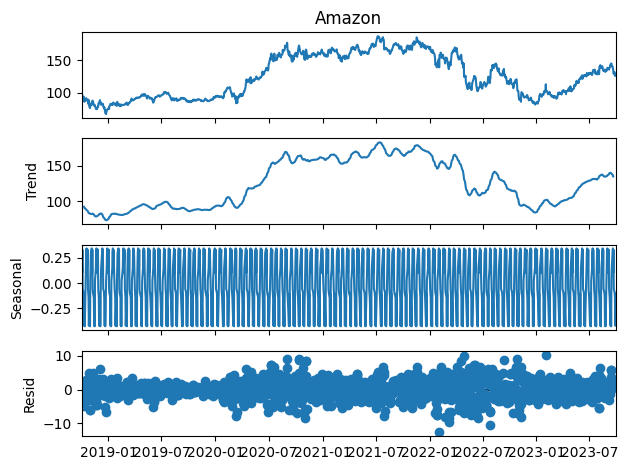

In [122]:
# Perform seasonal decomposition
result = seasonal_decompose(df['Amazon'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

Trend- Long-run increase/decrease and upward/downward non-linear increase
Seasonal - Short-term regular wave-like patterns
Residual - Unpredictable, random, “residual” fluctuations
Due to random variations of Nature or unusual events

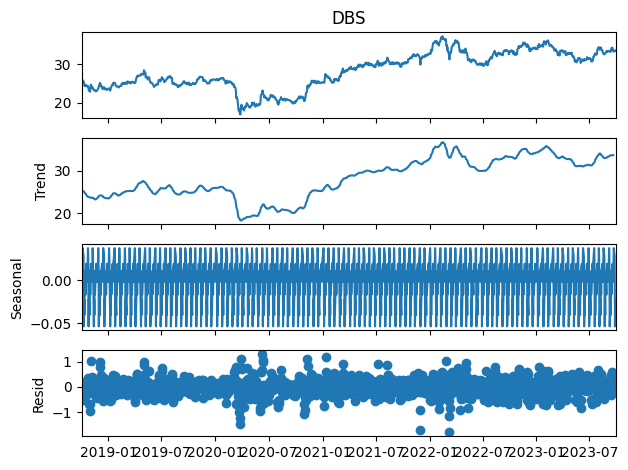

In [123]:
# Perform seasonal decomposition
result = seasonal_decompose(df['DBS'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

Trend- Fluctuating, Long-run increase and upward non-linear increase
Seasonal - Short-term regular wave-like patterns
Residual - Unpredictable, random, “residual” fluctuations
Due to random variations of Nature or unusual events

Differencing All the stock prices (As it is non-stationary)

Apple Stock Price before differencing p-value: 0.765069
Apple Stock Price after differencing p-value: 0.000000
Amazon Stock Price before differencing p-value: 0.458653
Amazon Stock Price after differencing p-value: 0.000000
DBS Stock Price before differencing p-value: 0.655680
DBS Stock Price after differencing p-value: 0.000000


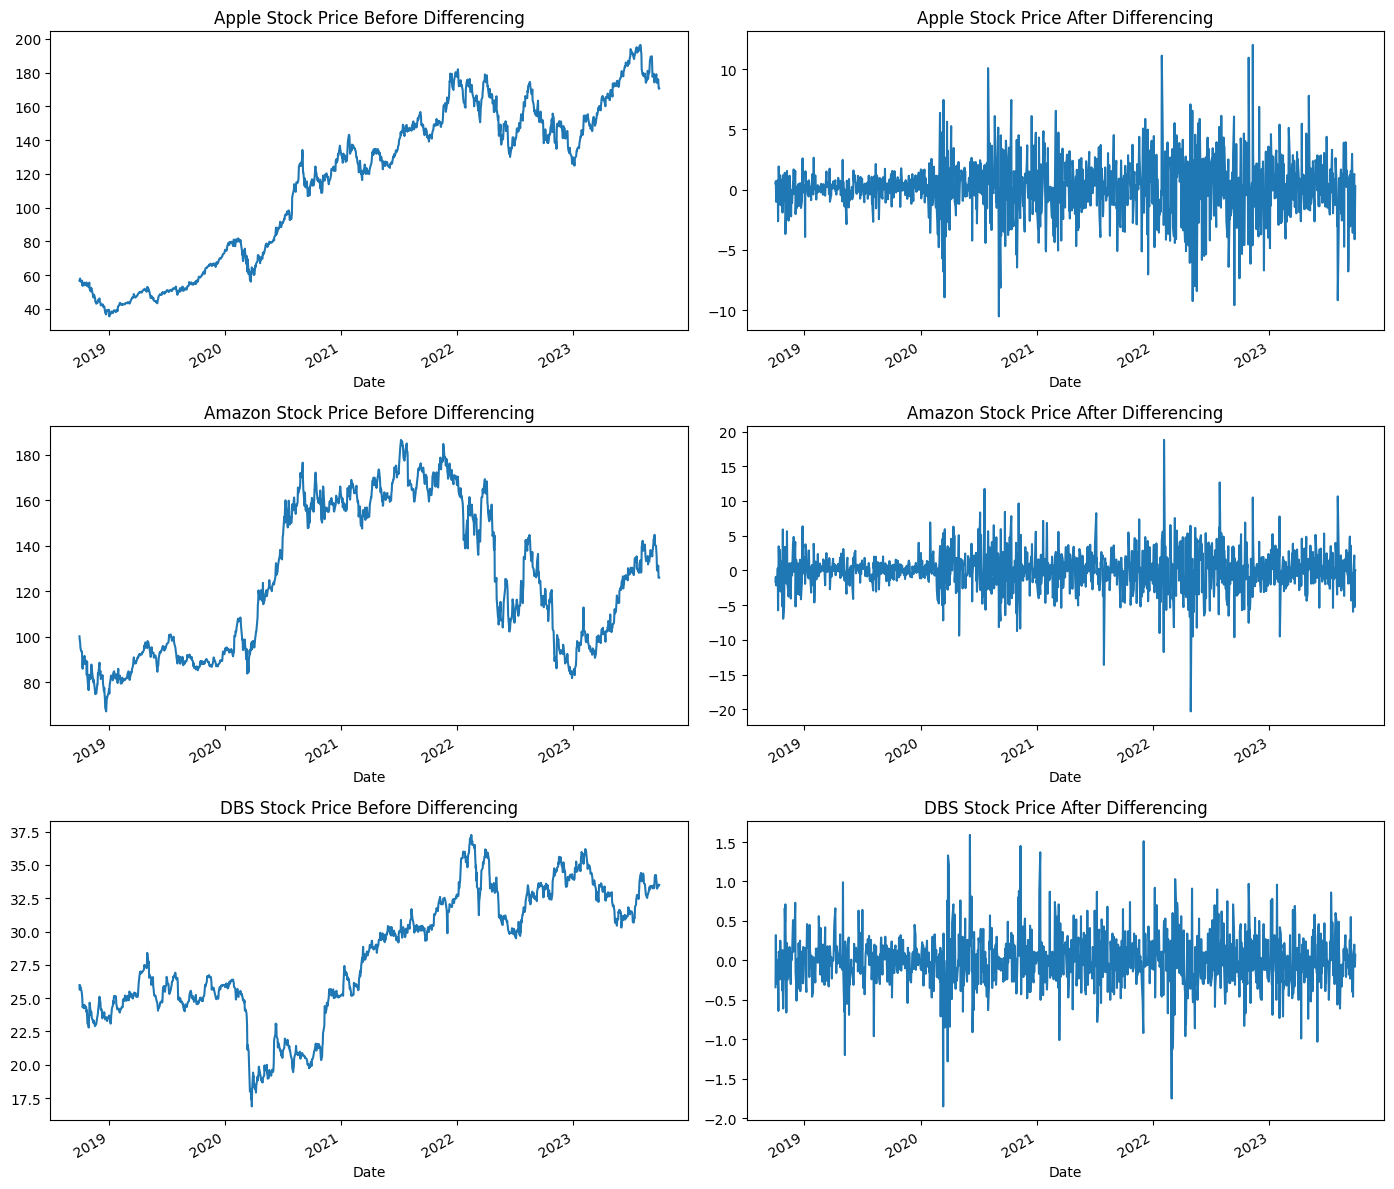

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

# Load your dataset and set the datetime index
df = pd.read_csv('CA2-Stock-Price-Data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Perform differencing operation for Apple, Amazon, and DBS stock prices
df_diff_apple = diff(df['Apple'], k_diff=1)
df_diff_amazon = diff(df['Amazon'], k_diff=1)
df_diff_dbs = diff(df['DBS'], k_diff=1)

# Apply ADF test before differencing for Apple stock prices
result1_apple = adfuller(df['Apple'])
print('Apple Stock Price before differencing p-value: %f' % result1_apple[1])

# Apply ADF test after differencing for Apple stock prices
result2_apple = adfuller(df_diff_apple)
print('Apple Stock Price after differencing p-value: %f' % result2_apple[1])

# Apply ADF test before differencing for Amazon stock prices
result1_amazon = adfuller(df['Amazon'])
print('Amazon Stock Price before differencing p-value: %f' % result1_amazon[1])

# Apply ADF test after differencing for Amazon stock prices
result2_amazon = adfuller(df_diff_amazon)
print('Amazon Stock Price after differencing p-value: %f' % result2_amazon[1])

# Apply ADF test before differencing for DBS stock prices
result1_dbs = adfuller(df['DBS'])
print('DBS Stock Price before differencing p-value: %f' % result1_dbs[1])

# Apply ADF test after differencing for DBS stock prices
result2_dbs = adfuller(df_diff_dbs)
print('DBS Stock Price after differencing p-value: %f' % result2_dbs[1])

# Plot the time series before and after differencing for Apple stock prices
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
df['Apple'].plot(ax=ax[0, 0])
df_diff_apple.plot(ax=ax[0, 1])
ax[0, 0].set_title('Apple Stock Price Before Differencing')
ax[0, 1].set_title('Apple Stock Price After Differencing')

# Plot the time series before and after differencing for Amazon stock prices
df['Amazon'].plot(ax=ax[1, 0])
df_diff_amazon.plot(ax=ax[1, 1])
ax[1, 0].set_title('Amazon Stock Price Before Differencing')
ax[1, 1].set_title('Amazon Stock Price After Differencing')

# Plot the time series before and after differencing for DBS stock prices
df['DBS'].plot(ax=ax[2, 0])
df_diff_dbs.plot(ax=ax[2, 1])
ax[2, 0].set_title('DBS Stock Price Before Differencing')
ax[2, 1].set_title('DBS Stock Price After Differencing')

plt.tight_layout()
plt.show()


I have done differncing to make all the p-value to be 0, as the stock prices were non-stationary.

Building Time Series Models

Simple Moving Average

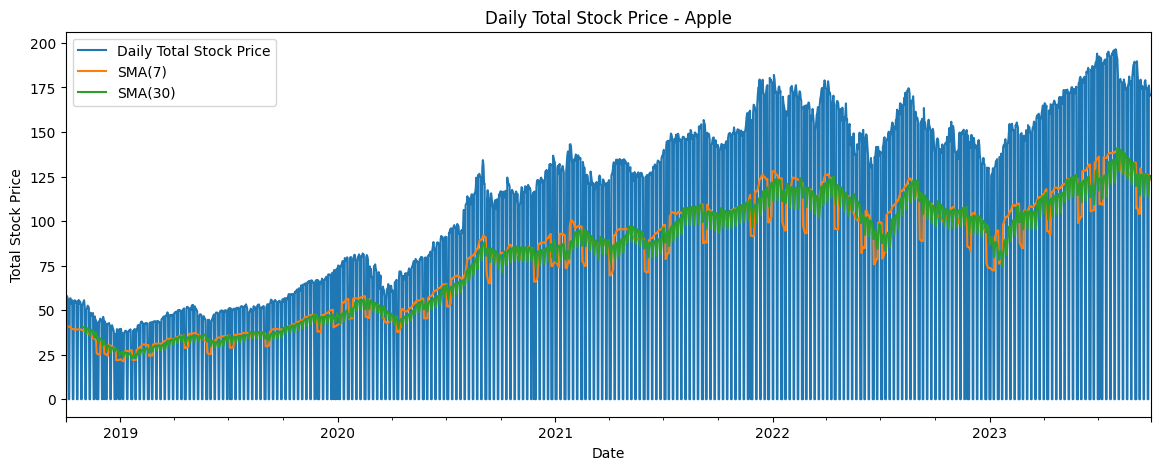

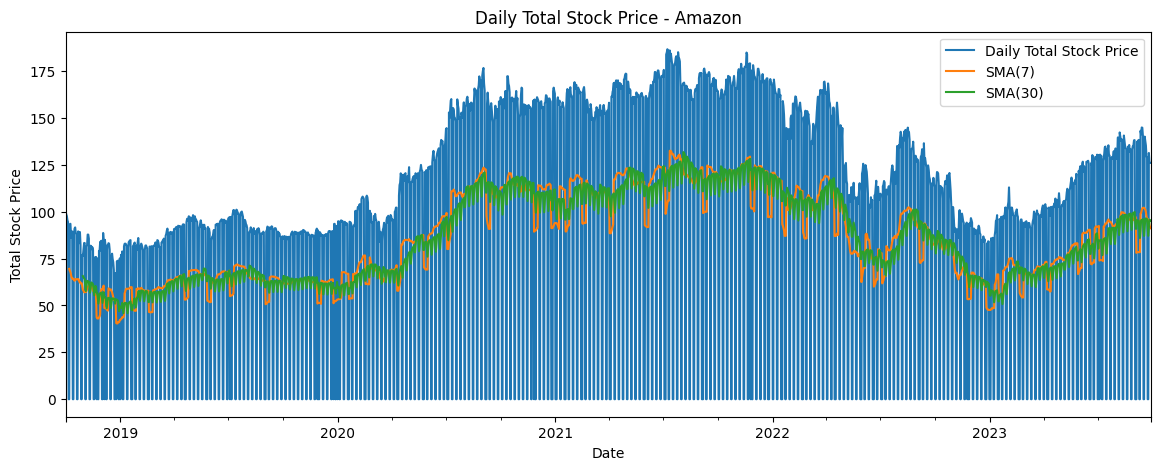

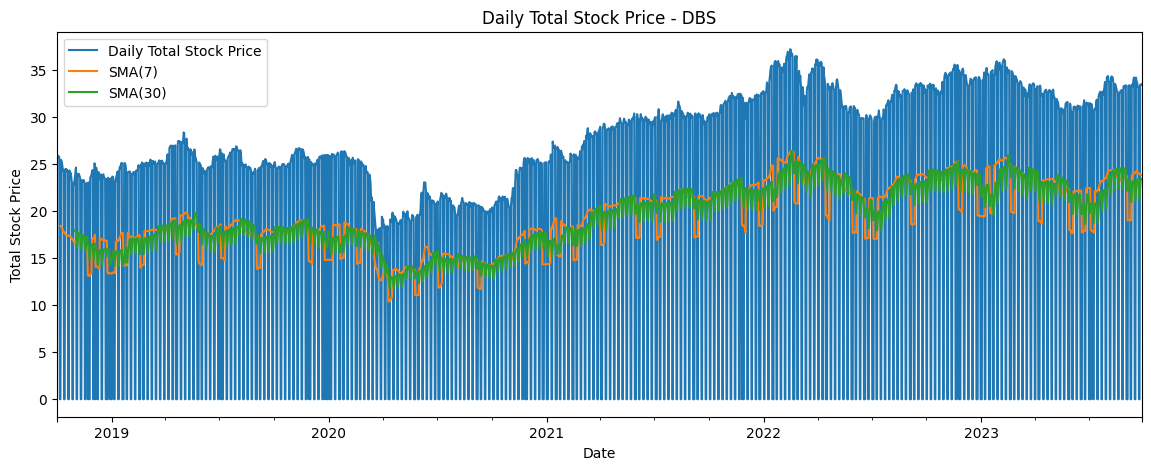

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset and set the datetime index
df = pd.read_csv('CA2-Stock-Price-Data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Calculate the daily total stock price for Apple
daily_stock_price_apple = df['Apple'].resample('D').sum()

# Plot the daily total stock price data for Apple
ax_apple = daily_stock_price_apple.plot(figsize=(14, 5))
ax_apple.set_title('Daily Total Stock Price - Apple')
ax_apple.set_ylabel('Total Stock Price')

# Calculate and plot the 7-day moving average for Apple
sma_7_apple = daily_stock_price_apple.rolling(window=7).mean()
sma_7_apple.plot(ax=ax_apple)

# Calculate and plot the 30-day moving average for Apple
sma_30_apple = daily_stock_price_apple.rolling(window=30).mean()
sma_30_apple.plot(ax=ax_apple)

# Add legend for Apple
ax_apple.legend(labels=['Daily Total Stock Price', 'SMA(7)', 'SMA(30)'])

# Show plot for Apple
plt.show()

# Repeat the above steps for Amazon and DBS

# Calculate the daily total stock price for Amazon
daily_stock_price_amazon = df['Amazon'].resample('D').sum()

# Plot the daily total stock price data for Amazon
ax_amazon = daily_stock_price_amazon.plot(figsize=(14, 5))
ax_amazon.set_title('Daily Total Stock Price - Amazon')
ax_amazon.set_ylabel('Total Stock Price')

# Calculate and plot the 7-day moving average for Amazon
sma_7_amazon = daily_stock_price_amazon.rolling(window=7).mean()
sma_7_amazon.plot(ax=ax_amazon)

# Calculate and plot the 30-day moving average for Amazon
sma_30_amazon = daily_stock_price_amazon.rolling(window=30).mean()
sma_30_amazon.plot(ax=ax_amazon)

# Add legend for Amazon
ax_amazon.legend(labels=['Daily Total Stock Price', 'SMA(7)', 'SMA(30)'])

# Show plot for Amazon
plt.show()

# Calculate the daily total stock price for DBS
daily_stock_price_dbs = df['DBS'].resample('D').sum()

# Plot the daily total stock price data for DBS
ax_dbs = daily_stock_price_dbs.plot(figsize=(14, 5))
ax_dbs.set_title('Daily Total Stock Price - DBS')
ax_dbs.set_ylabel('Total Stock Price')

# Calculate and plot the 7-day moving average for DBS
sma_7_dbs = daily_stock_price_dbs.rolling(window=7).mean()
sma_7_dbs.plot(ax=ax_dbs)

# Calculate and plot the 30-day moving average for DBS
sma_30_dbs = daily_stock_price_dbs.rolling(window=30).mean()
sma_30_dbs.plot(ax=ax_dbs)

# Add legend for DBS
ax_dbs.legend(labels=['Daily Total Stock Price', 'SMA(7)', 'SMA(30)'])

# Show plot for DBS
plt.show()


Holt-Winter Exponential Smoothing Model

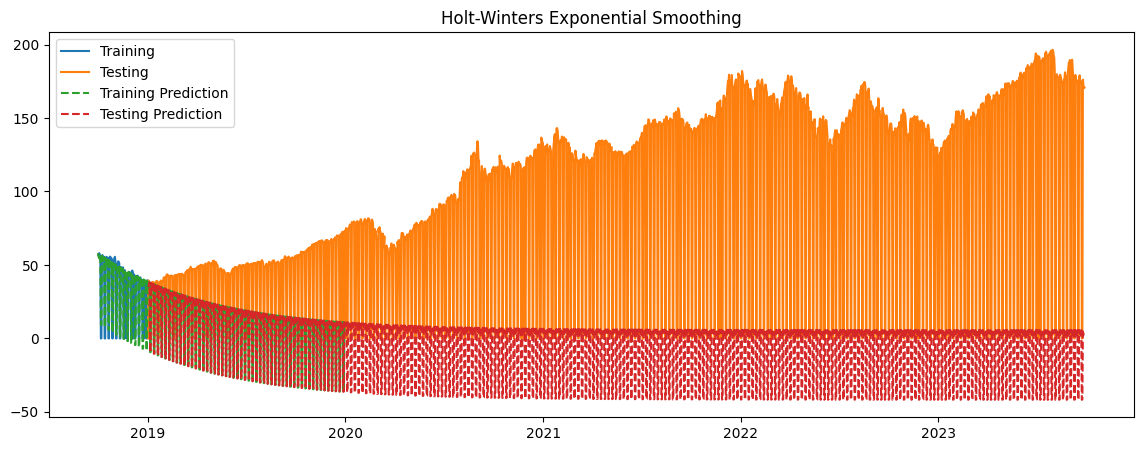

Model Mean Absolute Percentage Error on training data is 1194193126470831616.00%
Model Mean Absolute Percentage Error on testing data is 4972670940072117248.00%


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
df = pd.read_csv('CA2-Stock-Price-Data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Group and calculate daily stock price for Apple
daily_stock_price_apple = df['Apple'].resample('D').sum()

# Define training and testing datasets
train_data = daily_stock_price_apple[daily_stock_price_apple.index < '2019-01-01']
test_data = daily_stock_price_apple[daily_stock_price_apple.index >= '2019-01-01']

# Exponential Smoothing Model
es_model = ExponentialSmoothing(train_data, seasonal_periods=7, trend='add', seasonal='add',
                                damped_trend=True, freq='D').fit()

# Predictions
pred_train = es_model.predict(start='2018-10-01', end='2019-12-31')
pred_test = es_model.predict(start='2019-01-01', end='2023-09-28')

# Plotting
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='Training')
ax.plot(test_data, label='Testing')
ax.plot(pred_train, label='Training Prediction', linestyle='--')
ax.plot(pred_test, label='Testing Prediction', linestyle='--')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

# Evaluation
mape_train = mean_absolute_percentage_error(train_data, pred_train[train_data.index])
mape_test = mean_absolute_percentage_error(test_data, pred_test[test_data.index])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')









Building ARIMA Model

c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,0)(2,0,2)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  F

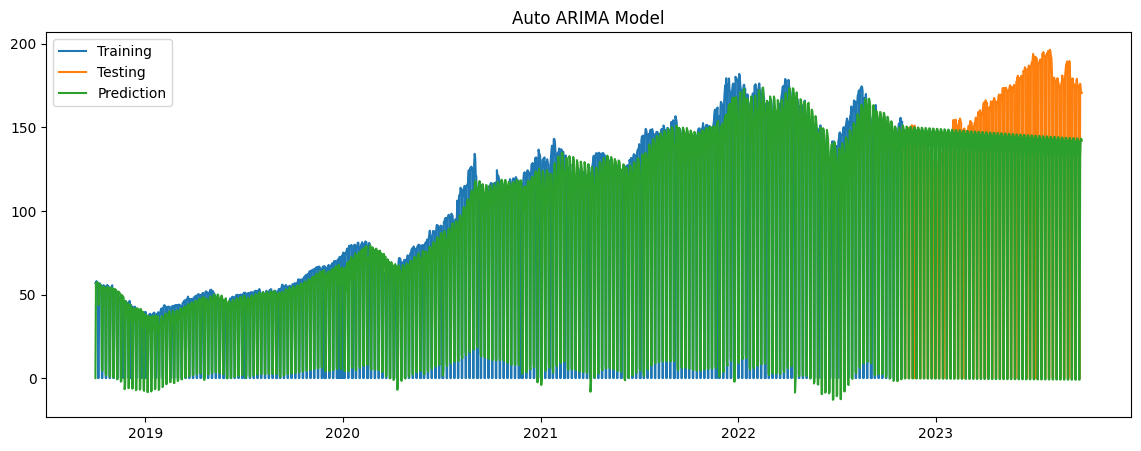

Model Mean Absolute Percentage Error on training data is 1794497486669984768.00%
Model Mean Absolute Percentage Error on testing data is 1950873931667450112.00%


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
df = pd.read_csv('CA2-Stock-Price-Data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Group and calculate daily stock price for Apple
daily_stock_price_apple = df['Apple'].resample('D').sum()

# Define training and testing datasets
train_data = daily_stock_price_apple[daily_stock_price_apple.index < '2022-11-01']
test_data = daily_stock_price_apple[daily_stock_price_apple.index >= '2022-11-01']

# Auto-ARIMA model
arima_model = auto_arima(train_data, seasonal=True, m=7, n_jobs=-1)

# Use the model to make predictions
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=len(test_data))
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='Training')
ax.plot(test_data, label='Testing')
ax.plot(daily_stock_price_apple.index, pred_full, label='Prediction')
plt.legend()
plt.title('ARIMA Model')
plt.show()

# Evaluate the Auto-ARIMA model
mape_train = mean_absolute_percentage_error(train_data, pred_in_sample)
mape_test = mean_absolute_percentage_error(test_data, pred_out_sample)
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')


ARMIA Model after tuning hyper parameters

Missing Values:
 Apple     0
Amazon    0
DBS       0
dtype: int64


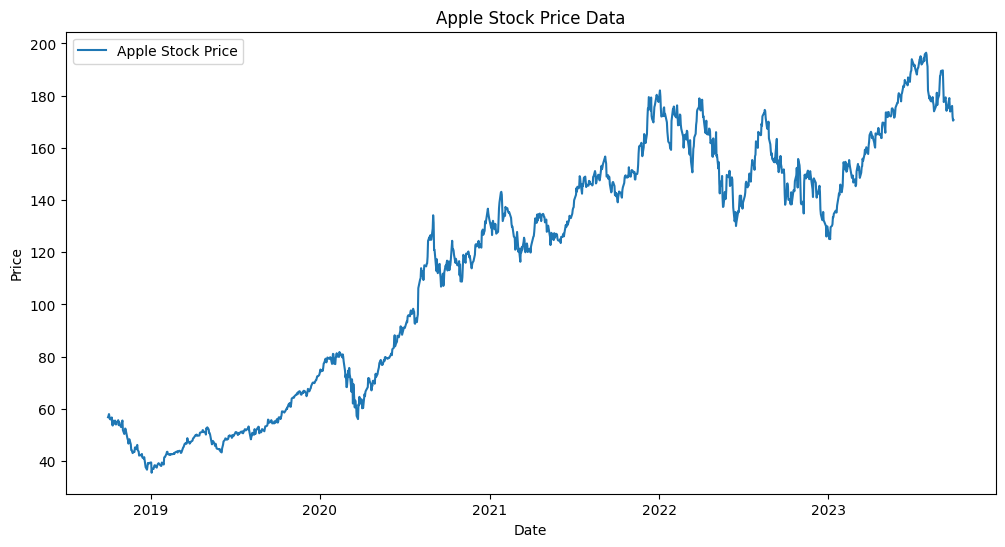

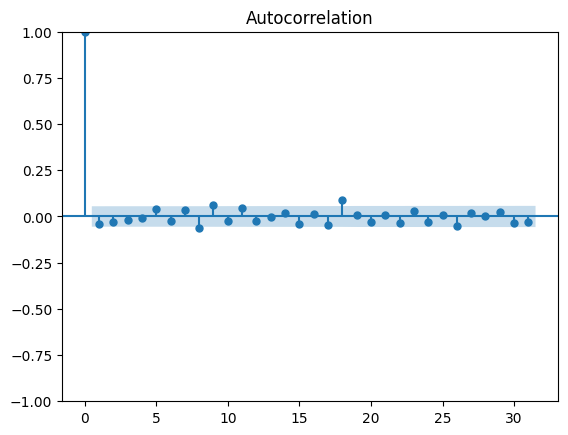

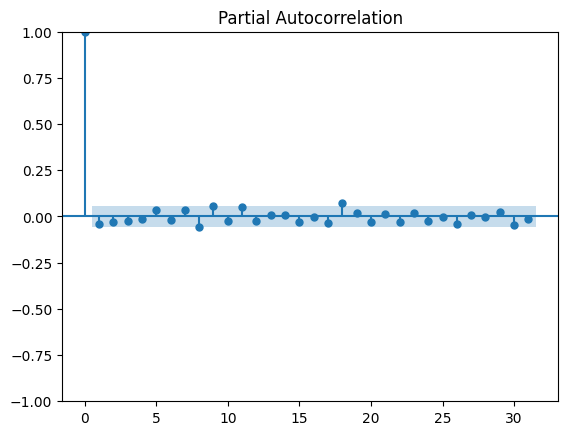

c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  war

                                     SARIMAX Results                                      
Dep. Variable:                              Apple   No. Observations:                 1257
Model:             ARIMA(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2866.100
Date:                            Fri, 09 Feb 2024   AIC                           5746.201
Time:                                    22:57:44   BIC                           5782.151
Sample:                                         0   HQIC                          5759.712
                                           - 1257                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6064      0.313     -1.940      0.052      -1.219       0.006
ar.L2          0.2555      0.305   

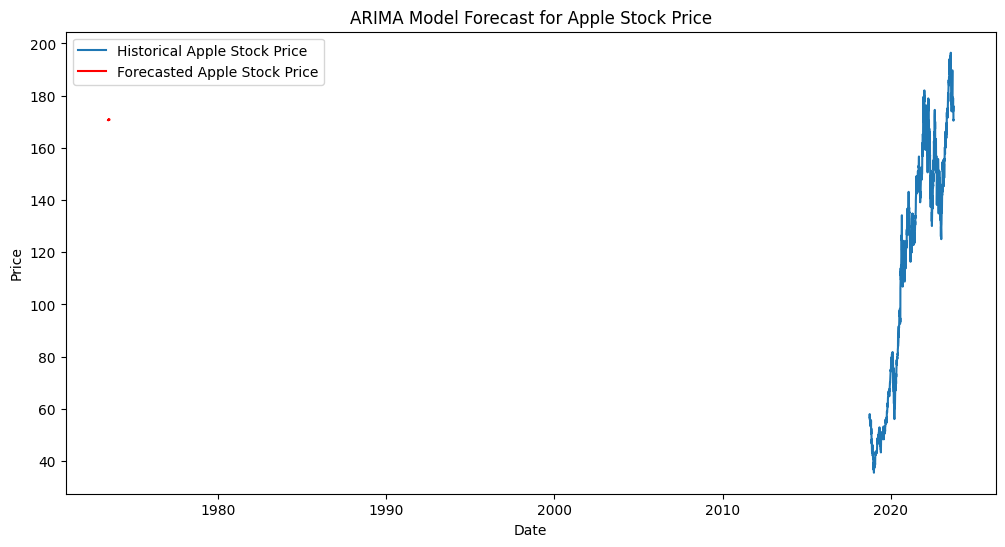

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the Data
df = pd.read_csv('CA2-Stock-Price-Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Preprocess the Data (if necessary)
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 3: Explore the Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Apple'], label='Apple Stock Price')
plt.title('Apple Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 4: Stationarize the Data (if necessary)
# Perform differencing
# df_diff = df['Price'].diff().dropna()  # Example: differencing
df_diff = df['Apple'].diff().dropna()  # Assuming 'Apple' is the column of interest

# Step 5: Identify ARIMA Orders
# Plot ACF and PACF
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()

# Step 6: Fit the ARIMA Model
# Best ARIMA order and seasonal order obtained from stepwise search
best_order = (2, 1, 2)
best_seasonal_order = (1, 0, 1, 12)

# Fit the ARIMA model
arima_model = ARIMA(df['Apple'], order=best_order, seasonal_order=best_seasonal_order).fit()

# Step 7: Review Model Summary
print(arima_model.summary())

# Step 8: Forecast
# Specify the number of steps ahead to forecast
forecast_steps = 30  # Example number of steps, adjust as needed

# Forecast
forecast = arima_model.forecast(steps=forecast_steps)

# Step 9: Evaluate (Optional)
# Evaluation metrics can be calculated using appropriate functions

# Step 10: Visualize
# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Apple'], label='Historical Apple Stock Price')
plt.plot(forecast.index, forecast, label='Forecasted Apple Stock Price', color='red')
plt.title('ARIMA Model Forecast for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



Working backwards to find the best hyper parameters

In [133]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit the AutoARIMA Model
# Assuming you have your data loaded into a DataFrame called 'df'
data = df['Apple']  # Replace 'Your_Column' with the actual column name

auto_arima_model = auto_arima(data, seasonal=True, m=12, trace=True)  # Example seasonal parameters

# Step 2: Extract Parameters
best_order = auto_arima_model.order
best_seasonal_order = auto_arima_model.seasonal_order

print("Best ARIMA Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)

# Step 3: Fit the ARIMA Model Manually
arima_model = ARIMA(data, order=best_order, seasonal_order=best_seasonal_order).fit()

# Step 4: Review Model Summary
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5743.856, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5745.151, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5744.975, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5743.681, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5745.236, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5745.195, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5746.818, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5743.678, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=5745.118, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=5746.788, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=5744.396, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5744.117, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5743.529, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]

c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lhchu\miniforge3\envs\AIML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Feature enginerring

Lag Feature

In [ ]:
# Feature Engineering
# Extract additional features if needed, such as year, month, day
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# Adding Lag Features
# Example: Adding lag features for Apple, Amazon, and DBS stock prices with lag 1
df['Apple_Lag1'] = df['Apple'].shift(1)
df['Amazon_Lag1'] = df['Amazon'].shift(1)
df['DBS_Lag1'] = df['DBS'].shift(1)

# Moving Averages
# Example: Adding moving averages for Apple, Amazon, and DBS stock prices over window sizes of 5, 10, and 20 days
window_sizes = [5, 10, 20]
for window in window_sizes:
    df[f'Apple_MA{window}'] = df['Apple'].rolling(window=window).mean()
    df[f'Amazon_MA{window}'] = df['Amazon'].rolling(window=window).mean()
    df[f'DBS_MA{window}'] = df['DBS'].rolling(window=window).mean()

# Volatility Measures
# Example: Adding rolling standard deviation for Apple stock prices over a window size of 5 days
df['Apple_StdDev'] = df['Apple'].rolling(window=5).std()

# Remove rows with missing values resulting from feature engineering
df.dropna(inplace=True)

Time Series Forecasting Model

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Apple'], label='Apple Stock Price')
plt.plot(df.index, df['Apple_Lag1'], label='Apple Lag1')
plt.plot(df.index, df['Apple_MA5'], label='Apple MA5')
plt.plot(df.index, df['Apple_StdDev'], label='Apple StdDev')
plt.title('Apple Stock Price and Engineered Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()